<a href="https://colab.research.google.com/github/igomes93/projetos_data_sciense/blob/master/An%C3%A1lise_RH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Definição do Problema** 

Definição do Problema
A empresa ZuZa Inc coletou dados do ano anterior com diversos atributos de funcionários de todos os setores. O objetivo é estudar a relação desses atributos e o impacto na promoção dos funcionários. Esse trabalho de análise pode ser usado mais tarde para construir modelos de Machine Learning para prever se um colaborador será ou não promovido.

Essas são as perguntas que devem ser respondidas:

Pergunta 1 - Qual a Correlação Entre os Atributos dos Funcionários?

Pergunta 2 - Qual o Tempo de Serviço da Maioria dos Funcionários?

Pergunta 3 - Qual Avaliação do Ano Anterior Foi Mais Comum?

Pergunta 4 - Qual a Distribuição das Idades dos Funcionários?

Pergunta 5 - Qual o Número de Treinamentos Mais Frequente?

Pergunta 6 - Qual a Proporção dos Funcionários Por Canal de Recrutamento?

Pergunta 7 - Qual a Relação Entre a Promoção e a Avaliação do Ano Anterior?




## **Carregando e instalando pacotes**

In [1]:
#versão do python usada no projeto
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.10


In [2]:
#importando pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


**Carregando os dados**

In [3]:
dadosrh=pd.read_csv('dadosRH.csv')

In [4]:
dadosrh.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [5]:
dadosrh.shape # informa (quantidade de linhas,quantidade de colunas)

(54808, 11)

**Análise exploratória,Limpeza e tranformação dos dados**

manipulando os dados e corrigindo problemas



In [6]:
dadosrh.isnull().sum() #verificando os valores que estão nulos (Ausentes) eftuando a soma do total de registros ausentes

id_funcionario            0
departmento               0
regiao                    0
educacao               2409
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

In [7]:
dadosrh.groupby(['educacao']).count() #Agrupando as informações da coluna educação e contando os valores-o groupby não considera valores ausentes

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,458,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14798,14925,14925
Superior,36669,36669,36669,36669,36669,36669,36669,33404,36669,36669


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


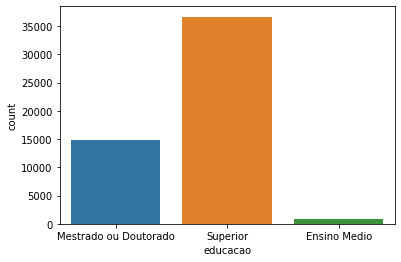

In [8]:
sns.countplot(dadosrh['educacao'])

In [9]:
dadosrh.groupby(['aval_ano_anterior']).count() # estamos agora agrupando os dados e efetuando a contagemde outra coluna que apresentou dados ausentes (avaliação do ano anterior)

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,5887,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4035,4225,4225,4225,4225,4225,4225
3.0,18618,18618,18618,17867,18618,18618,18618,18618,18618,18618
4.0,9877,9877,9877,9509,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11362,11741,11741,11741,11741,11741,11741


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


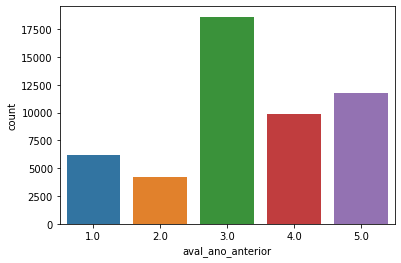

In [10]:
sns.countplot(dadosrh['aval_ano_anterior'])

Vamos aplicar a imputação e preencher os valores ausentes

vamos usar a moda do valores


In [11]:
dadosrh['educacao'].fillna(dadosrh['educacao'].mode()[0],inplace=True)
#dadosrh é a tabela munipulando a  coluna educacao.fillna é preencher os valores ausente, 
#calculando a moda desconsiderando os valores ausentes, retornando o maior valor e inplace é para gravar na coluna


In [12]:
dadosrh['aval_ano_anterior'].fillna(dadosrh['aval_ano_anterior'].median(),inplace=True)
#dadosrh é a tabela munipulando a  coluna aval_ano_anterior.fillna é preencher os valores ausente, 
#calculando a mediana desconsiderando os valores ausentes,e inplace é para gravar na coluna


In [13]:
dadosrh.isnull().sum()#verificando se os dados foram preenchidos como anteriormente 

id_funcionario         0
departmento            0
regiao                 0
educacao               0
genero                 0
canal_recrutamento     0
numero_treinamentos    0
idade                  0
aval_ano_anterior      0
tempo_servico          0
promovido              0
dtype: int64

In [14]:
dadosrh.shape

(54808, 11)

In [15]:
# agrupando os dados para verificarmos as mudanças de valores nas colunas
dadosrh.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,805,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14925,14925,14925
Superior,39078,39078,39078,39078,39078,39078,39078,39078,39078,39078


In [16]:
dadosrh.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4225,4225,4225,4225,4225,4225,4225
3.0,22742,22742,22742,22742,22742,22742,22742,22742,22742,22742
4.0,9877,9877,9877,9877,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11741,11741,11741,11741,11741,11741,11741


Vamos verificar o balanceamento de classe na variável promovido

In [17]:
dadosrh.groupby(['promovido']).count() #podemos perceber que 0 são pessoas que não foram promovidas e 1 pessoa que foram promovidas

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico
promovido,,,,,,,,,,
0,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140
1,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


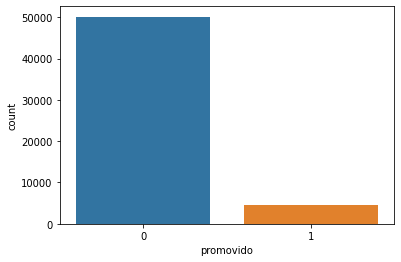

In [18]:
sns.countplot(dadosrh['promovido'])

In [19]:
df_classe_majoritaria=dadosrh[dadosrh.promovido==0]
df_classe_minoritaria=dadosrh[dadosrh.promovido==1]

In [20]:
df_classe_majoritaria.shape #contagem de linhas doa não promovidos

(50140, 11)

In [21]:
df_classe_minoritaria.shape #contagem de linhas dos promovidos

(4668, 11)

In [22]:
#Upsample
#vamos utilizar a tecnica de reamostragem aumentando a classe minoritaria
from sklearn.utils import resample
df_classe_minoritaria_upsampled = resample(df_classe_minoritaria, 
                                           replace = True,     
                                           n_samples = 50140,   
                                           random_state = 150) 

In [23]:
#vamos concatenar a classe majoritaria com a nova classe minoritaria

dadosrh_balanceados=pd.concat([df_classe_majoritaria,df_classe_minoritaria_upsampled])

In [24]:
#vamos contar o valores de promovidos e não promovidos, depois da manipulação de dados acima
dadosrh_balanceados.promovido.value_counts()

1    50140
0    50140
Name: promovido, dtype: int64

In [25]:
dadosrh_balanceados.info() #variaveis no conjunto de dados

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100280 entries, 0 to 5869
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_funcionario       100280 non-null  int64  
 1   departmento          100280 non-null  object 
 2   regiao               100280 non-null  object 
 3   educacao             100280 non-null  object 
 4   genero               100280 non-null  object 
 5   canal_recrutamento   100280 non-null  object 
 6   numero_treinamentos  100280 non-null  int64  
 7   idade                100280 non-null  int64  
 8   aval_ano_anterior    100280 non-null  float64
 9   tempo_servico        100280 non-null  int64  
 10  promovido            100280 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 9.2+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


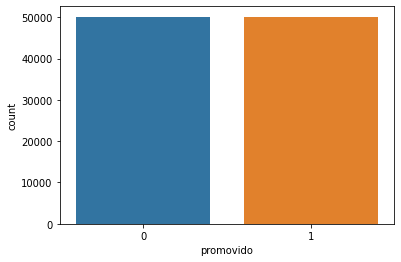

In [26]:
sns.countplot(dadosrh_balanceados['promovido']) #percebemos que os dados se igualaram

os dados estão balanceados. salvando em disco

In [27]:
dadosrh_balanceados.to_csv('dadosRH_modificado.csv', encoding = 'utf-8', index = False)

Agora vamos efetuar a análise de dados

In [28]:
dataset=pd.read_csv('dadosRH_modificado.csv')

In [29]:
dataset.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [30]:
dataset.shape

(100280, 11)

Pergunta 1 - Qual a Correlação Entre os Atributos dos Funcionários?

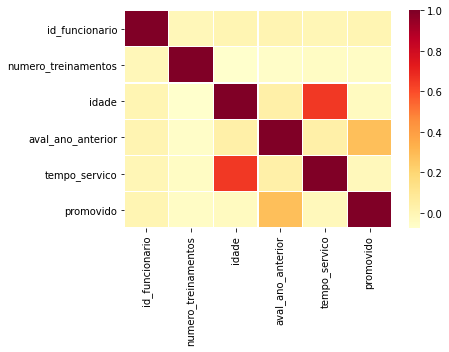

In [31]:
#como é uma correlação entre atributos podemos usar o heatmap que é um mapa de calor e ajuda a construir uma matriz de correlação
import matplotlib.pyplot as plt
import seaborn as sns
corr=dataset.corr()#da liguagem python para correlação
sns.heatmap(corr,cmap='YlOrRd',linewidths=0.1) #cmap é uma argumento para criar o mapa com determinada cor especifica
plt.show()

Pergunta 2 - Qual o Tempo de Serviço da Maioria dos Funcionários?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


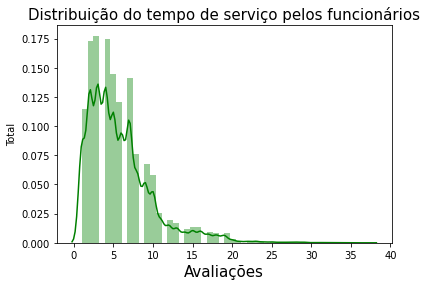

In [33]:
#vamos avaliar a distribuição da variavel de tempo de serviço, por isso vamos usar um gráfico de distribuição
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset['tempo_servico'],color='green') #usamos o distplot como gráfico de distribuição chamando a coluna a ser analisada no dataset
plt.title('Distribuição do tempo de serviço pelos funcionários',fontsize=15) #atribuindo um titulo e tamanho da fonte no gráfico
plt.xlabel('Avaliações',fontsize=15)#atribuindo um titula a variavel x 
plt.ylabel('Total')#atribuindo um titulo a variavel y
plt.show()

Pergunta 3 - Qual Avaliação do Ano Anterior Foi Mais Comum?




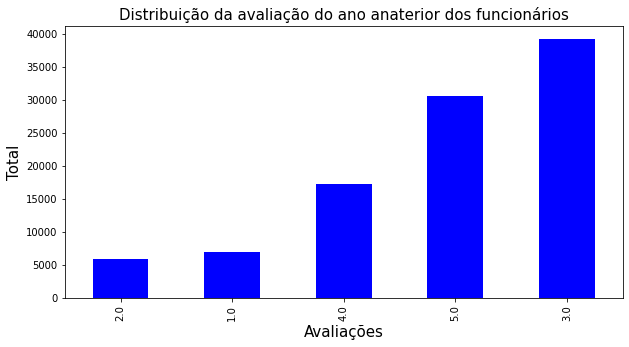

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset['aval_ano_anterior'].value_counts().sort_values().plot.bar(color='blue',figsize=(10,5))
# vamos chamar a coluna e usar o metodo value_counts para contar os elementos e depois sort_values para ordenar os valores e logo depois usar um gráfico de barras 
plt.title('Distribuição da avaliação do ano anaterior dos funcionários',fontsize=15)
plt.xlabel('Avaliações',fontsize=15)
plt.ylabel('Total',fontsize=15)
plt.show()

Pergunta 4 - Qual a Distribuição das Idades dos Funcionários?


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


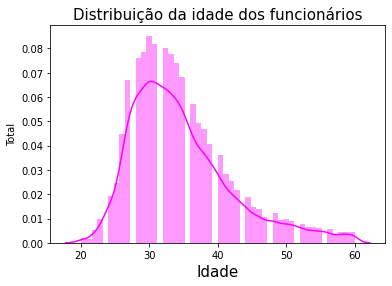

In [40]:
import matplotlib.pyplot as plt # como a perguntas nos remete a distribuição da idade do funcionário criamos um gráfico de distribuição
import seaborn as sns
sns.distplot(dataset['idade'],color= 'magenta')
plt.title('Distribuição da idade dos funcionários',fontsize=15)
plt.xlabel('Idade',fontsize=15)
plt.ylabel('Total')
plt.show()


Pergunta 5 - Qual o Número de Treinamentos Mais Frequente?



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


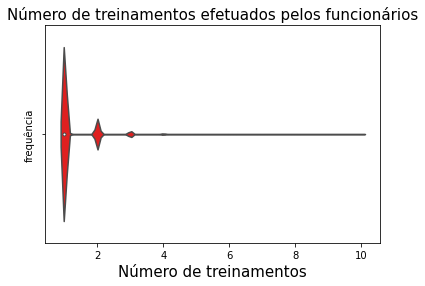

In [45]:
import matplotlib.pyplot as plt #vamos efetuar uma avaliação de frequência dos números de treinamento
import seaborn as sns
sns.violinplot(dataset['numero_treinamentos'], color='red')
plt.title('Número de treinamentos efetuados pelos funcionários', fontsize=15)
plt.xlabel('Número de treinamentos',fontsize=15)
plt.ylabel('frequência')
plt.show()

#podemos destacar que maioria do funcionarios só fez um treinamento, baixíssima capacitação por parte dos funcionários

Pergunta 6 - Qual a Proporção dos Funcionários Por Canal de Recrutamento?


<function matplotlib.pyplot.show>

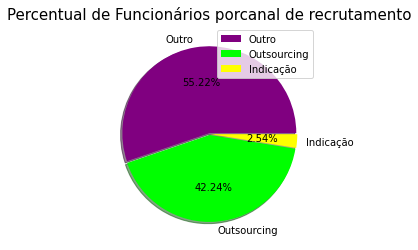

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset['canal_recrutamento'].value_counts()# para pegar os totais de "Outro","Outsourcing","Indicação"
fatias=[55375,42358,2547] #colocamos o valor que cada um representa no toral
labels="Outro","Outsourcing","Indicação"
colors=['purple','lime','yellow'] #para atribuirmos as cores ao gráfico
explode=[0.01,0.01,0.01]# para afastar os pedaços das fatias
plt.pie(fatias,labels=labels,colors=colors,explode=explode,shadow=True,autopct="%.2f%%") #shadow=true é colocar uma sombra e autopct as percentagens dos valores
plt.title('Percentual de Funcionários porcanal de recrutamento',fontsize=15)  
plt.axis('off')
plt.legend() #legenda do gráfico
plt.show

Pergunta 7 - Qual a Relação Entre a Promoção e a Avaliação do Ano Anterior?


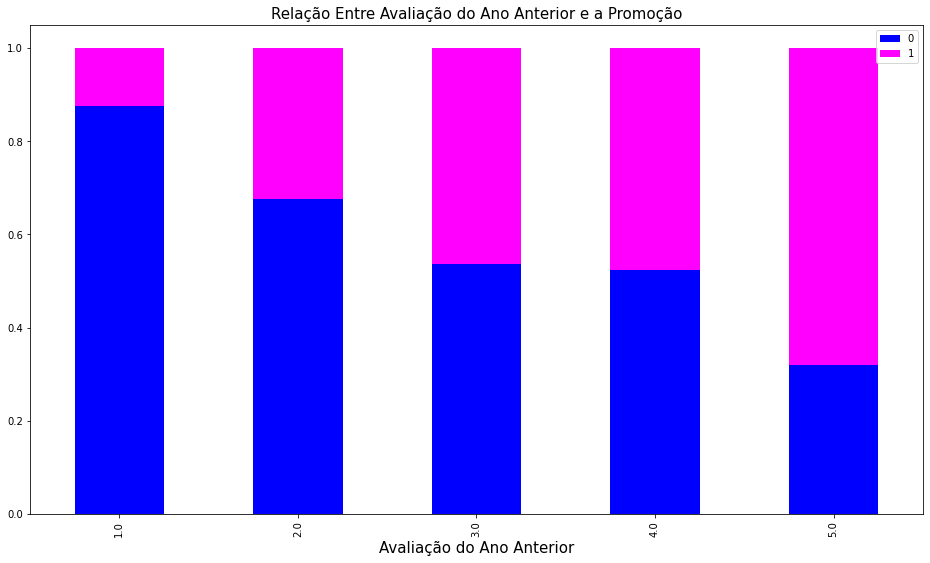

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.crosstab(dataset['aval_ano_anterior'], dataset['promovido']) # criação de tabela cruzada no pandas
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', #div para dividir a tabela e logo depois realiza o somatório e converte para float
                                                   stacked = True, #logo depois valo criar um plot do tipo barra, stecked =true e para um gráfico de barras com dois valores
                                                   figsize = (16, 9), #tamanho da figura
                                                   color = ['blue', 'magenta'])
plt.title('Relação Entre Avaliação do Ano Anterior e a Promoção', fontsize = 15)
plt.xlabel('Avaliação do Ano Anterior', fontsize = 15)
plt.legend()
plt.show()

# podemos avaliar a relação entre a promoção e avaliação do funcionário onde que em sua grande maioria os que tiveram a nota 1 não foram promovidos
# e os que ficaram com nota 5 em grande maioria foram promovidos

CréditosDSA